In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import  regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

filterwarnings('ignore',category=DeprecationWarning)
filterwarnings('ignore',category=FutureWarning)
filterwarnings('ignore',category=UserWarning)

In [2]:
No_Data_Path = Path('no/')
Yes_Data_Path = Path('yes/')

In [5]:
No_JPG_Path = list(No_Data_Path.glob(r'*.jpg'))
Yes_JPG_Path = list(Yes_Data_Path.glob(r'*.jpg'))

In [6]:
print(No_JPG_Path[:5])
print('-'*40)
print(Yes_JPG_Path[:5])

[WindowsPath('no/no0.jpg'), WindowsPath('no/no1.jpg'), WindowsPath('no/no10.jpg'), WindowsPath('no/no100.jpg'), WindowsPath('no/no1000.jpg')]
----------------------------------------
[WindowsPath('yes/y0.jpg'), WindowsPath('yes/y1.jpg'), WindowsPath('yes/y10.jpg'), WindowsPath('yes/y100.jpg'), WindowsPath('yes/y1000.jpg')]


In [7]:
Yes_No_list = No_JPG_Path + Yes_JPG_Path

In [8]:
print(len(Yes_No_list))

3000


In [10]:
print(Yes_No_list[0:10])

[WindowsPath('no/no0.jpg'), WindowsPath('no/no1.jpg'), WindowsPath('no/no10.jpg'), WindowsPath('no/no100.jpg'), WindowsPath('no/no1000.jpg'), WindowsPath('no/no1001.jpg'), WindowsPath('no/no1002.jpg'), WindowsPath('no/no1003.jpg'), WindowsPath('no/no1004.jpg'), WindowsPath('no/no1005.jpg')]


In [11]:
JPG_labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1],Yes_No_list))

In [14]:
JPG_labels[-10:]

['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']

In [15]:
print('Yes Labels : ',JPG_labels.count('yes'))
print('No Labels : ',JPG_labels.count('no'))

Yes Labels :  1500
No Labels :  1500


In [16]:
JPG_Path_Series = pd.Series(Yes_No_list,name='JPG').astype(str)
JPG_Category_Series = pd.Series(JPG_labels,name='Tumor_Category')

In [18]:
JPG_Path_Series.head()

0       no\no0.jpg
1       no\no1.jpg
2      no\no10.jpg
3     no\no100.jpg
4    no\no1000.jpg
Name: JPG, dtype: object

In [19]:
JPG_Category_Series.head()

0    no
1    no
2    no
3    no
4    no
Name: Tumor_Category, dtype: object

In [21]:
DataSet = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [22]:
DataSet

,JPG,Tumor_Category
0,no\no0.jpg,no
1,no\no1.jpg,no
2,no\no10.jpg,no
3,no\no100.jpg,no
4,no\no1000.jpg,no
...,...,...
2995,yes\y995.jpg,yes
2996,yes\y996.jpg,yes
2997,yes\y997.jpg,yes
2998,yes\y998.jpg,yes


In [23]:
Predication_Path = Path('pred/')
Test_JPG_Path = list(Predication_Path.glob(r'*.jpg'))

In [24]:
Test_JPG_Path[:5]

[WindowsPath('pred/pred0.jpg'),
 WindowsPath('pred/pred1.jpg'),
 WindowsPath('pred/pred10.jpg'),
 WindowsPath('pred/pred11.jpg'),
 WindowsPath('pred/pred12.jpg')]

In [25]:
Test_JPG_labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [27]:
Test_JPG_labels[:5]

['pred', 'pred', 'pred', 'pred', 'pred']

In [29]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_labels,name="TUMOR_CATEGORY")

In [31]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)
Test_Data.head(5)

,JPG,TUMOR_CATEGORY
0,pred\pred0.jpg,pred
1,pred\pred1.jpg,pred
2,pred\pred10.jpg,pred
3,pred\pred11.jpg,pred
4,pred\pred12.jpg,pred


In [32]:
DataSet = DataSet.sample(frac=1).reset_index(drop=True)

In [33]:
DataSet.head()

,JPG,Tumor_Category
0,no\no48.jpg,no
1,yes\y1243.jpg,yes
2,yes\y1025.jpg,yes
3,no\no520.jpg,no
4,no\no858.jpg,no


Text(0.5, 1.0, 'yes')

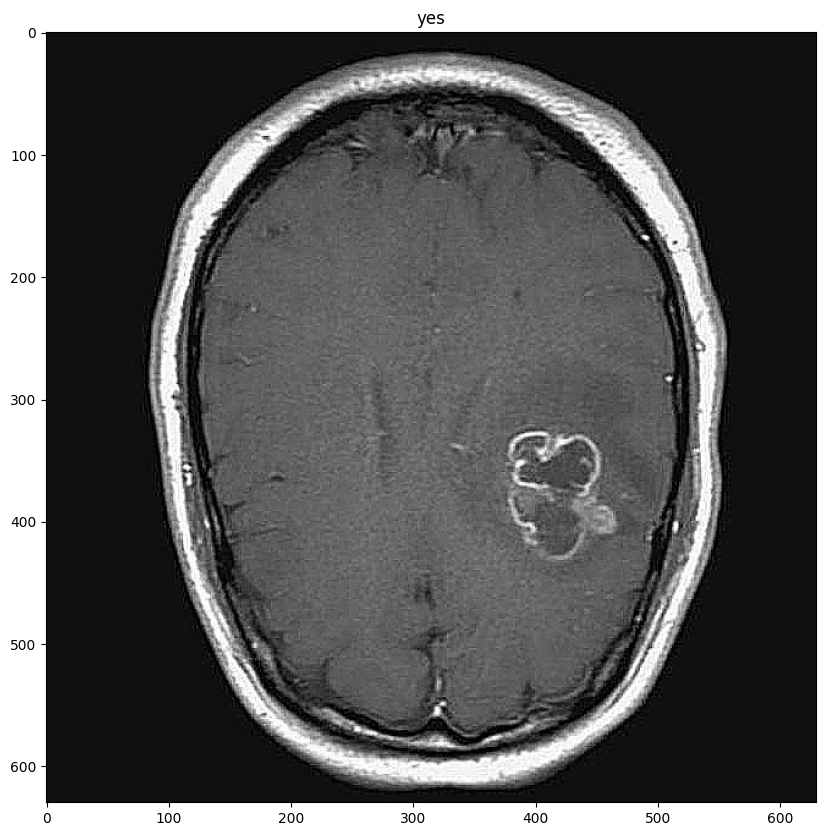

In [40]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(DataSet['JPG'][2]))
plt.title(DataSet['Tumor_Category'][2])

Text(0.5, 1.0, 'no')

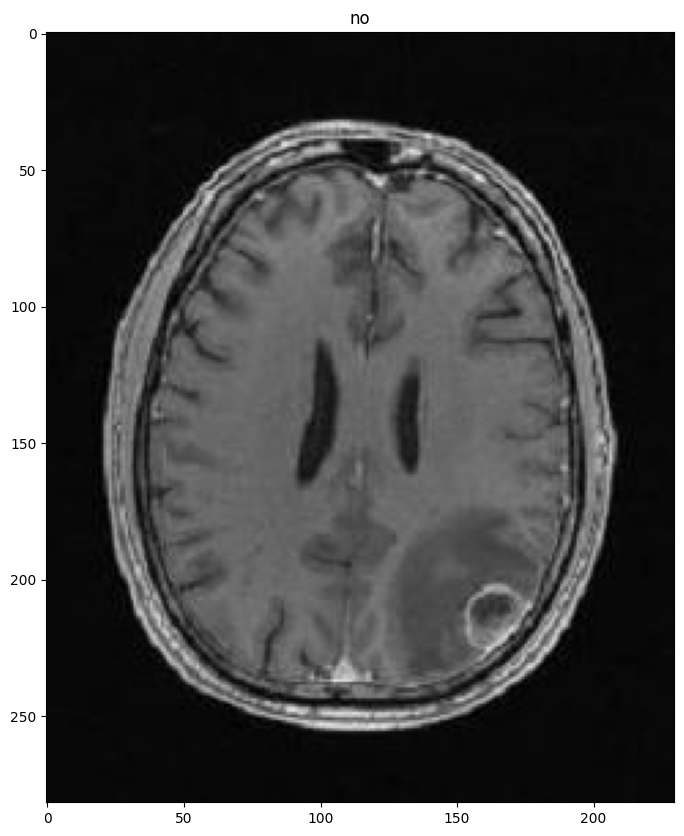

In [41]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(DataSet['JPG'][0]))
plt.title(DataSet['Tumor_Category'][0])

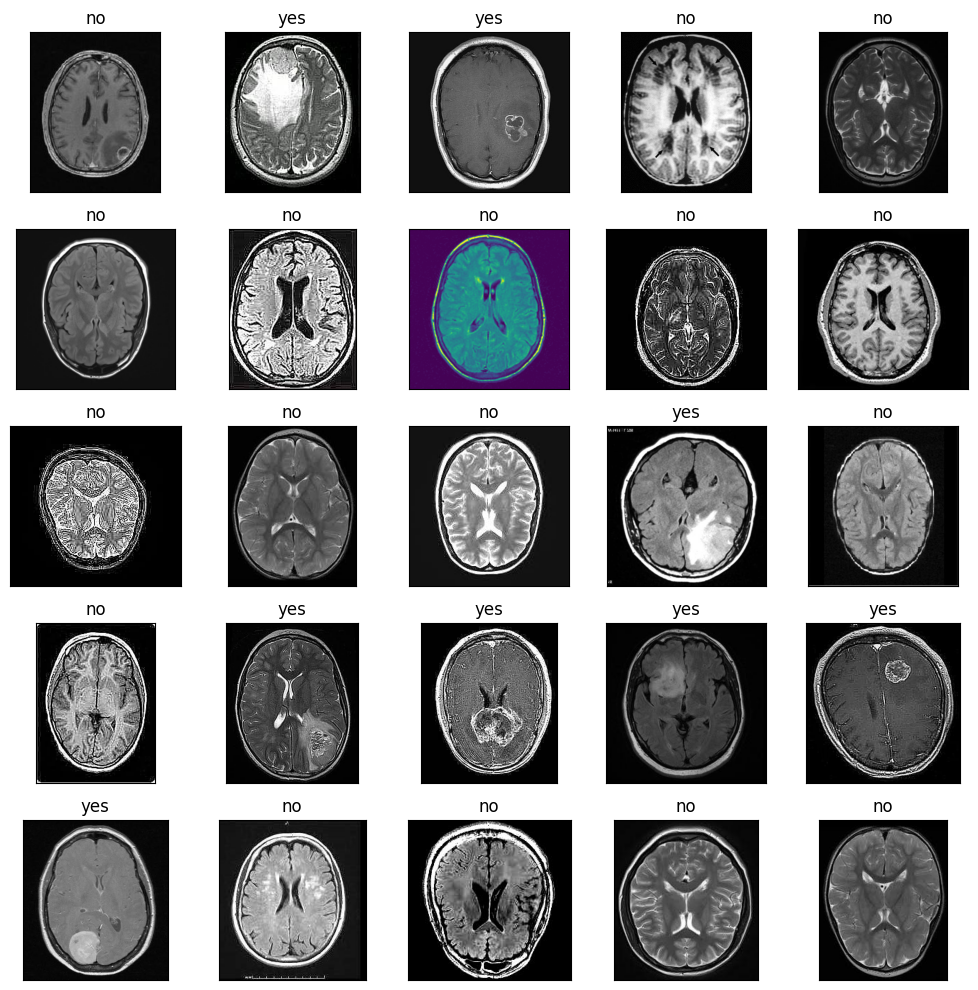

In [45]:
fig,axes = plt.subplots(nrows=5,ncols=5,figsize= (10,10),subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(DataSet['JPG'][i]))
    ax.set_title(DataSet['Tumor_Category'][i])

plt.tight_layout()

In [56]:
train_data,test_data = train_test_split(DataSet,test_size=0.1,random_state=42)

In [57]:
train_data.shape

(2700, 2)

In [58]:
train_data.head()

,JPG,Tumor_Category
433,no\no278.jpg,no
1151,yes\y562.jpg,yes
73,no\no1122.jpg,no
1536,no\no528.jpg,no
2709,yes\y1479.jpg,yes


In [59]:
test_data.head()

,JPG,Tumor_Category
1801,no\no6.jpg,no
1190,no\no1085.jpg,no
1817,no\no759.jpg,no
251,yes\y642.jpg,yes
2505,yes\y817.jpg,yes


In [60]:
Generator_Basic= ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [96]:
Train_Set = Generator_Basic.flow_from_dataframe(
    dataframe=train_data,
    x_col='JPG',
    y_col='Tumor_Category',
    color_mode='grayscale',
    class_mode='categorical',
    subset='training',
    batch_size=20,
    target_size=(200,200)
)

Found 2160 validated image filenames belonging to 2 classes.


In [97]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="Tumor_Category",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 540 validated image filenames belonging to 2 classes.


In [98]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="Tumor_Category",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


In [99]:
for data_batch,label_batch in Train_Set:
    print('Data shape',data_batch.shape)
    print('label shape',label_batch.shape)
    break

Data shape (20, 200, 200, 1)
label shape (20, 2)


In [100]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [101]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [102]:
print(Train_Set.class_indices)

{'no': 0, 'yes': 1}


In [103]:
print(Train_Set.image_shape)

(200, 200, 1)


In [69]:
model = Sequential([
    # Input layer
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(200,200,1)),
    MaxPooling2D(2,2),
    
    # Feature extraction
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    
    # Classification layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # 2 units for binary classification
])

In [70]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [71]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

In [72]:
history = model.fit(
    Train_Set,
    validation_data=Validation_Set,
    epochs=15,
    callbacks=[reduce_lr]
)

Epoch 1/15
108/108 [==============================] - 4s 33ms/step - loss: 0.5638 - accuracy: 0.7454 - val_loss: 0.4011 - val_accuracy: 0.8148 - lr: 0.0010
Epoch 2/15
108/108 [==============================] - 3s 30ms/step - loss: 0.3442 - accuracy: 0.8616 - val_loss: 0.2535 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 3/15
108/108 [==============================] - 3s 30ms/step - loss: 0.2078 - accuracy: 0.9255 - val_loss: 0.1572 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 4/15
108/108 [==============================] - 3s 29ms/step - loss: 0.1270 - accuracy: 0.9519 - val_loss: 0.1039 - val_accuracy: 0.9630 - lr: 0.0010
Epoch 5/15
108/108 [==============================] - 3s 29ms/step - loss: 0.0796 - accuracy: 0.9773 - val_loss: 0.1314 - val_accuracy: 0.9519 - lr: 0.0010
Epoch 6/15
108/108 [==============================] - 3s 30ms/step - loss: 0.0868 - accuracy: 0.9745 - val_loss: 0.0771 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 7/15
108/108 [==============================] - 3s 29ms/st

In [76]:
HistoryDict = history.history

val_losses = HistoryDict['val_loss']
val_acc = HistoryDict['val_accuracy']
acc = HistoryDict['accuracy']
losses = HistoryDict['loss']
epochs = range(1,len(val_losses) + 1)

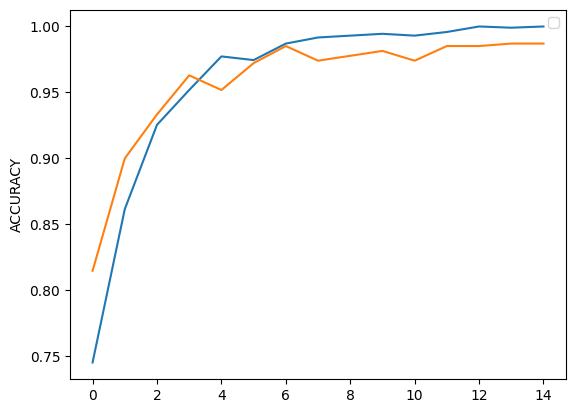

In [77]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

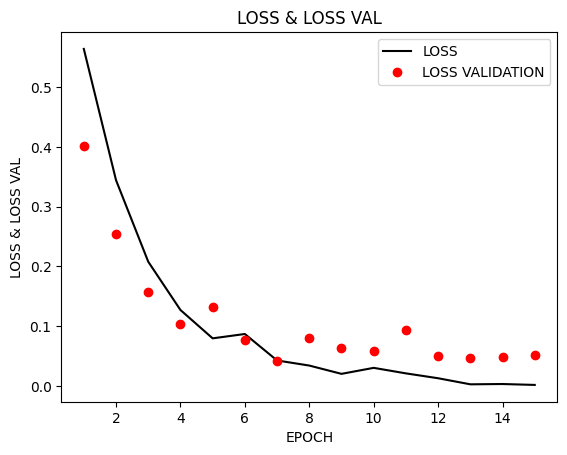

In [79]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

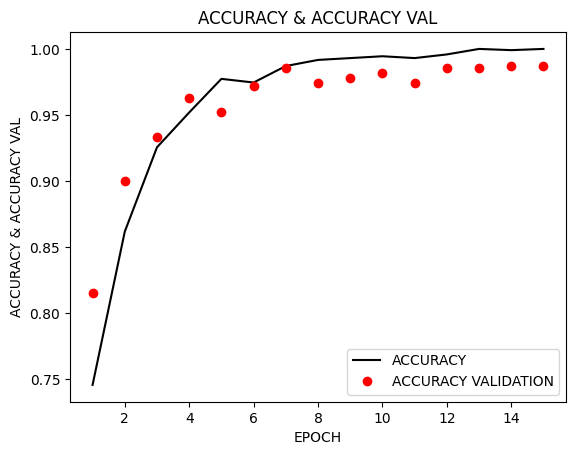

In [80]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<Axes: >

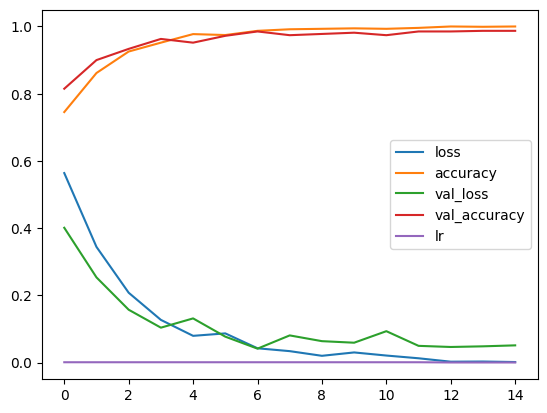

In [81]:
Dict_Summary = pd.DataFrame(history.history)
Dict_Summary.plot()

In [85]:
Model_Results = model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.1030
ACCURACY:  0.98


In [86]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [89]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [90]:
Model_Test_Prediction = model.predict(Main_Test_Set)

3/3 [==============================] - 0s 166ms/step


In [91]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [95]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO']


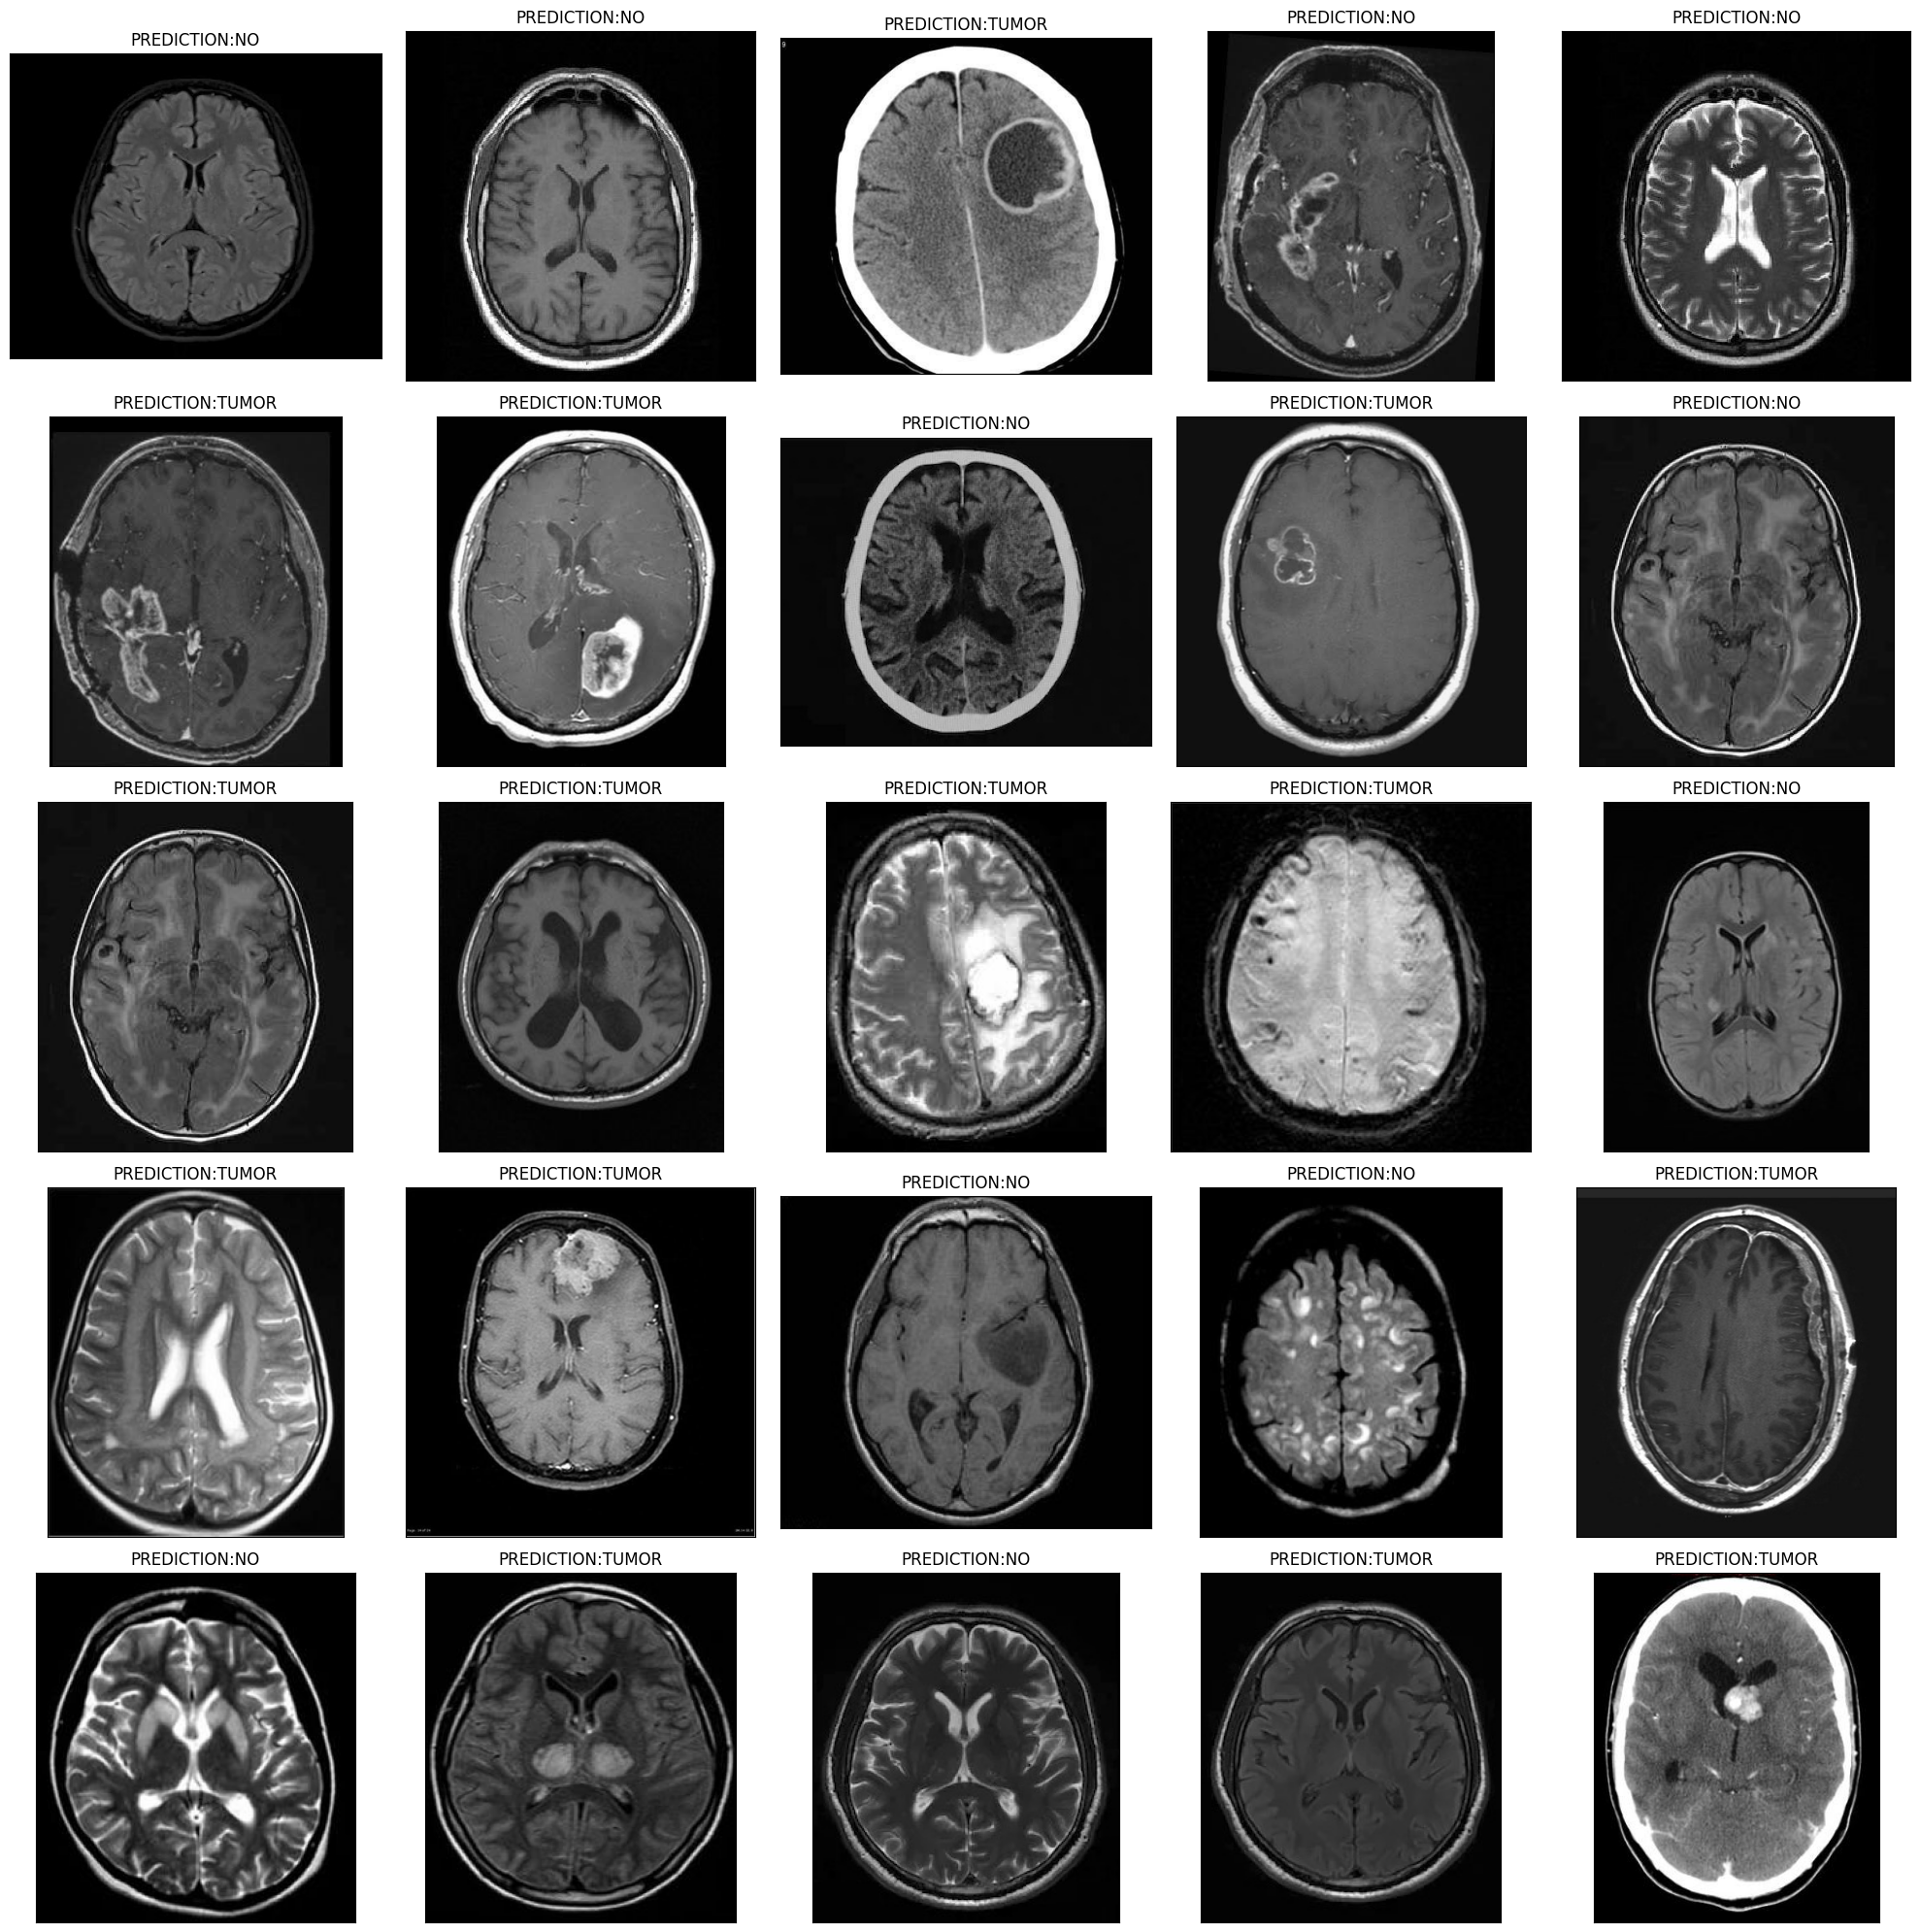

In [96]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Test_Data["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()